In [24]:
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from skimage.transform import (hough_line, hough_line_peaks, probabilistic_hough_line)
from skimage.feature import canny
from skimage import data, exposure
import matplotlib.pyplot as plt
from matplotlib import cm
import cv2
from skimage import io
import math
from skimage.filters import rank
from skimage.morphology import disk
from skimage.draw import line

Text(0.5, 1.0, 'Equalized image')

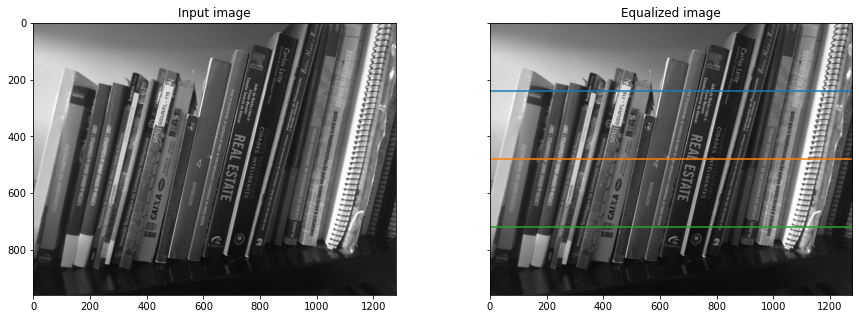

In [25]:
image = io.imread('../data/50.jpg', as_gray=True)
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[1].plot((0, 1280), (240, 240))   
ax[1].plot((0, 1280), (480, 480))
ax[1].plot((0, 1280), (720, 720))
ax[1].imshow(image, cmap=cm.gray)
ax[1].set_title('Equalized image')

In [26]:
def count_lines(lines, height):
    count = 0
    threshold = height/2
    for line in lines:
        p0, p1 = line
        if p0[1] < threshold and p1[1] > threshold or p1[1] < threshold and p0[1] > threshold:
            count += 1
    return count

In [28]:
def houghLinesSciKit(sigma, low_threshold, high_threshold,
                    threshold, line_length, line_gap):
    # Line finding using the Probabilistic Hough Transform
    image = io.imread('../data/50.jpg', as_gray=True)
    # Global equalize
    # selem = disk(300)
    # image_equalized = rank.equalize(image, selem=selem)
    image_equalized = exposure.equalize_adapthist(image)
    edges = canny(image_equalized, sigma=sigma, low_threshold=low_threshold, high_threshold=high_threshold)
    lines = probabilistic_hough_line(edges, threshold=threshold, line_length=line_length, line_gap=line_gap)
    print(len(lines))

    # Generating figure 2
    fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(image, cmap=cm.gray)
    ax[0].set_title('Input image')
    
    ax[1].imshow(image_equalized, cmap=cm.gray)
    ax[1].set_title('Equalized image')

    ax[2].imshow(edges, cmap=cm.gray)
    ax[2].set_title(f'Canny edges sigma:{sigma}, low:{low_threshold}, high:{high_threshold}')

    ax[3].imshow(edges * 0)
    lines.sort()
    for line in lines:
        p0, p1 = line
        ax[3].plot((p0[0], p1[0]), (p0[1], p1[1]))
    ax[3].set_xlim((0, image.shape[1]))
    ax[3].set_ylim((image.shape[0], 0))
    ax[3].set_title(f'Probabilistic Hough threshold:{threshold}, length:{line_length}, gap:{line_gap}')
    print(count_lines(lines, image.shape[0]))
    
    #for line in new_lines:
    #    p0, p1 = line
    #    ax[3].plot((p0[0], p1[0]), (p0[1], p1[1]))
    #ax[3].set_xlim((0, image.shape[1]))
    #ax[3].set_ylim((image.shape[0], 0))
    #ax[3].set_title(f'Probabilistic Hough threshold:{threshold}, length:{line_length}, gap:{line_gap}')

    for a in ax:
        a.set_axis_off()

    plt.tight_layout()
    plt.show()
    
interact_manual(houghLinesSciKit, sigma=4.0, low_threshold=0.1, high_threshold=0.3, threshold=5, 
                line_length=150, line_gap=4)


interactive(children=(FloatSlider(value=4.0, description='sigma', max=12.0, min=-4.0), FloatSlider(value=0.1, …

<function __main__.houghLinesSciKit(sigma, low_threshold, high_threshold, threshold, line_length, line_gap)>